## Import libraries

In [2]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
np.random.seed(12)

## Description

This notebook explores the effects of aridity on the distribution of streamflow.  

## Scenario 1: Streamflow distribution differences from aridity
The effect of aridity on streamflow distributions. For this scenario, w is held constant at 2.6. 

In [13]:
noise = 0.2
n = 1000
w = 2.6
pet_p_1 = 0.5 + noise * np.random.randn(n)
pet_p_1[pet_p_1 < 0] = 0
pet_p_2 = 2.0 + noise * np.random.randn(n)
pet_p_2[pet_p_2 < 0] = 0

aet_p_1 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w)**(1/w)))
q_p_1 = 1-aet_p_1
q_p_1[q_p_1 < 0] = 0 

aet_p_2 = (1 + (pet_p_2) - ((1 + (pet_p_2)**w)**(1/w)))
q_p_2 = 1-aet_p_2
q_p_2[q_p_2 < 0] = 0 

### Plot

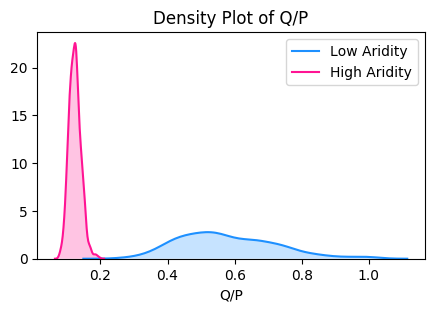

In [4]:
plt.figure(figsize=(5, 3), dpi=100)
sns.kdeplot(q_p_1, color="dodgerblue", label="Low Aridity", shade=True)
sns.kdeplot(q_p_2, color="deeppink", label="High Aridity", shade=True)
plt.title("Density Plot of Q/P")
plt.xlabel("Q/P")
plt.legend()

## Scenario 2: Streamflow distribution differences from changes in water availability (low aridity)
Here, we hold aridity constant at a energy-limited condition (PET/P = 0.5) and we change water availability through w = 1.6, 2.6, and 3.6.

In [7]:
noise = 0.2
n = 1000
w_1 = 1.6
w_2 = 2.6
w_3 = 3.6
pet_p_1 = 0.5 + noise * np.random.randn(n)
pet_p_1[pet_p_1 < 0] = 0

aet_p_1 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w_1)**(1/w_1)))
q_p_1 = 1-aet_p_1
q_p_1[q_p_1 < 0] = 0

aet_p_2 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w_2)**(1/w_2)))
q_p_2 = 1-aet_p_2
q_p_2[q_p_2 < 0] = 0 

aet_p_3 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w_3)**(1/w_3)))
q_p_3 = 1-aet_p_3
q_p_3[q_p_3 < 0] = 0 

### Plot

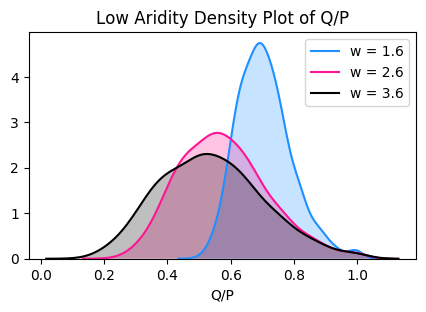

In [8]:
plt.figure(figsize=(5, 3), dpi=100)
sns.kdeplot(q_p_1, color="dodgerblue", label="w = 1.6", shade=True)
sns.kdeplot(q_p_2, color="deeppink", label="w = 2.6", shade=True)
sns.kdeplot(q_p_3, color="black", label="w = 3.6", shade=True)
plt.title("Low Aridity Density Plot of Q/P")
plt.xlabel("Q/P")
plt.legend()

## Scenario 2: Streamflow distribution differences from changes in water availability (high aridity)
Here, we hold aridity constant at a water-limited condition (PET/P = 2.0) and we change water availability through w = 1.6, 2.6, and 3.6.

In [12]:
noise = 0.2
n = 1000
w_1 = 1.6
w_2 = 2.6
w_3 = 3.6
pet_p_1 = 2.0 + noise * np.random.randn(n)
pet_p_1[pet_p_1 < 0] = 0

aet_p_1 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w_1)**(1/w_1)))
q_p_1 = 1-aet_p_1
q_p_1[q_p_1 < 0] = 0

aet_p_2 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w_2)**(1/w_2)))
q_p_2 = 1-aet_p_2
q_p_2[q_p_2 < 0] = 0 

aet_p_3 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w_3)**(1/w_3)))
q_p_3 = 1-aet_p_3
q_p_3[q_p_3 < 0] = 0 

### Plot

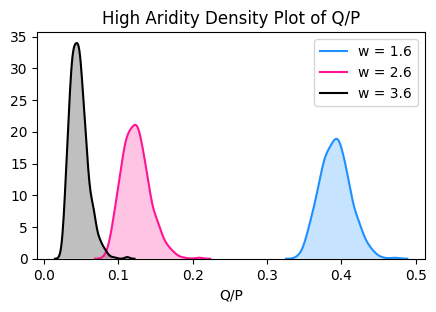

In [10]:
plt.figure(figsize=(5, 3), dpi=100)
sns.kdeplot(q_p_1, color="dodgerblue", label="w = 1.6", shade=True)
sns.kdeplot(q_p_2, color="deeppink", label="w = 2.6", shade=True)
sns.kdeplot(q_p_3, color="black", label="w = 3.6", shade=True)
plt.title("High Aridity Density Plot of Q/P")
plt.xlabel("Q/P")
plt.legend()

## Explore changes in distribution across all water- energy-limitations

In [11]:
noise = 0.2
n = 1000
w_list = [1.6, 2.6, 3.6]
pet_p_list = np.linspace(0.1, 6, 100)

res = np.zeros([len(w_list), len(pet_p_list)])
for iw, w in enumerate(w_list):
    for ip, pet_p in enumerate(pet_p_list):
        
        pet_p_1 = pet_p + noise * np.random.randn(n)
        pet_p_1[pet_p_1 < 0] = 0

        aet_p_1 = (1 + (pet_p_1) - ((1 + (pet_p_1)**w)**(1/w)))
        q_p_1 = 1-aet_p_1
        q_p_1[q_p_1 < 0] = 0
        
        res[iw, ip] = q_p_1.std()

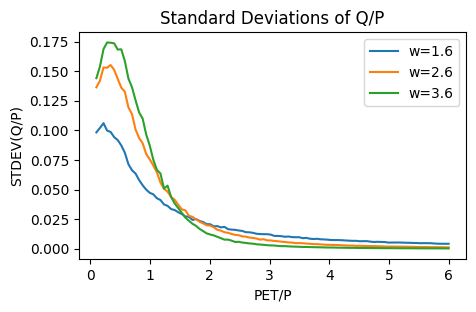

In [40]:
plt.figure(figsize=(5, 3), dpi=100)
plt.plot(pet_p_list, res[0,:], label="w=1.6")
plt.plot(pet_p_list, res[1,:], label="w=2.6")
plt.plot(pet_p_list, res[2,:], label="w=3.6")
plt.title("Standard Deviation of Q/P")
plt.xlabel("PET/P")
plt.ylabel("STDEV(Q/P)")
plt.legend()